## Tasks:

1. Extract association rules using a minimum support of 0.01 and a minimum confidence threshold of 0.1.
2. Create a heatmap showing the number of association rules for different combinations of minimum support values (0.001, 0.005, 0.01, 0.05) and minimum confidence thresholds (0.05, 0.075, 0.1).
3. Identify the association rule(s) with the highest confidence for a minimum support of 0.005 and report the confidence value.

In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'Firstone_Grocery_Items_.csv'
grocery_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
grocery_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,canned beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,shopping bags,beef,citrus fruit,cat food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,onions,root vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bottled beer,domestic eggs,brown bread,chewing gum,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rolls/buns,other vegetables,chewing gum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1. Extract Association Rules (Minimum Support = 0.01, Minimum Confidence = 0.1)**

In [6]:
# Preprocessing the data
transactions = grocery_data.stack().groupby(level=0).apply(list).tolist()
encoder = TransactionEncoder()
trans_encoded = encoder.fit(transactions).transform(transactions)
df_trans_encoded = pd.DataFrame(trans_encoded, columns=encoder.columns_)

In [7]:
# Applying Apriori Algorithm
frequent_itemsets = apriori(df_trans_encoded, min_support=0.01, use_colnames=True)

In [8]:
# Generating Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

In [9]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(other vegetables),0.096750,0.12225,0.010875,0.112403,0.919453,-0.000953,0.988906,-0.088412
1,(other vegetables),(whole milk),0.122250,0.15825,0.014625,0.119632,0.755968,-0.004721,0.956134,-0.268881
2,(rolls/buns),(whole milk),0.108625,0.15825,0.014625,0.134638,0.850790,-0.002565,0.972714,-0.164404
3,(soda),(whole milk),0.096750,0.15825,0.012125,0.125323,0.791930,-0.003186,0.962355,-0.225334
4,(yogurt),(whole milk),0.086125,0.15825,0.011625,0.134978,0.852943,-0.002004,0.973097,-0.158716


**Output Explaination:**

The output you're seeing is a set of association rules generated from your grocery dataset using the Apriori algorithm, with a minimum support of 0.01 and a minimum confidence threshold of 0.1. Each row in the output represents an association rule. Let's break down the columns to understand what each one represents:

1. ***antecedents***: This is the item or set of items on the left-hand side of the rule. For example, in the first rule, the antecedent is `(soda)`.

2. ***consequents***: This is the item or set of items on the right-hand side of the rule. In the first rule, the consequent is `(other vegetables)`.

3. ***antecedent support***: This is the proportion of transactions in the dataset that contain the antecedent. For instance, `0.096750` for `(soda)` means that soda is present in about 9.68% of all transactions.

4. ***consequent support***: This is the proportion of transactions that contain the consequent. For `(other vegetables)`, the support is `0.12225`, meaning other vegetables are in about 12.23% of transactions.

5. ***support***: This is the proportion of transactions that contain both the antecedent and consequent. The support for the first rule is `0.010875`, indicating that soda and other vegetables are bought together in about 1.09% of transactions.

6. ***confidence***: This metric indicates the likelihood of the consequent being bought when the antecedent is bought. A confidence of `0.112403` in the first rule means that there's about an 11.24% chance of buying other vegetables when soda is bought.

7. ***lift***: This measures how much more often the antecedent and consequent are bought together than expected if they were statistically independent. A lift value less than 1, like in the first rule (`0.919453`), suggests that buying the antecedent actually decreases the likelihood of buying the consequent.

8. ***leverage***: This measures the difference in the support for the rule from what would be expected if the antecedent and consequent were independent. Negative leverage (e.g., `-0.000953` in the first rule) suggests a negative association.

9. ***conviction***: This measures the strength of implication of a rule. A higher conviction value means the consequent is highly dependent on the antecedent. For the first rule, the conviction is `0.988906`, suggesting a moderate-to-strong implication.

10. ***zhangs_metric***: This is a measure of the reliability of the rule, with values ranging from -1 to 1. A value near 0, like `-0.088412` in the first rule, indicates a weaker association.

In summary, each rule shows a specific relationship between a set of items (antecedents) and another item (consequent), along with metrics that describe the strength, reliability, and significance of this relationship in your dataset.

**2. Create a Heatmap for Different Combinations of Minimum Support Values and Confidence Thresholds**

In [11]:
# Define the ranges of minimum support values and confidence thresholds
min_support_values = [0.001, 0.005, 0.01, 0.05]
min_confidence_thresholds = [0.05, 0.075, 0.1]

In [12]:
# Prepare a DataFrame to hold the counts of rules
heatmap_data = pd.DataFrame(index=min_confidence_thresholds, columns=min_support_values)

In [13]:
# Loop over the values and calculate the number of rules
for support in min_support_values:
    frequent_itemsets = apriori(df_trans_encoded, min_support=support, use_colnames=True)
    for confidence in min_confidence_thresholds:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        heatmap_data.at[confidence, support] = len(rules)

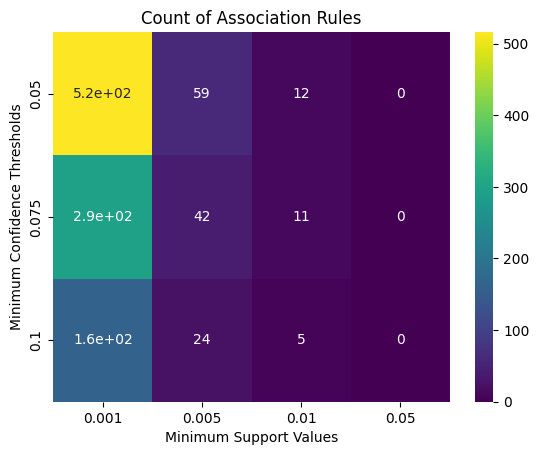

In [15]:
# Convert all values in heatmap_data to integers
heatmap_data = heatmap_data.astype(int)

# Plotting the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.xlabel('Minimum Support Values')
plt.ylabel('Minimum Confidence Thresholds')
plt.title('Count of Association Rules')
plt.show()

**PLot Explaination**

The heatmap provided visualizes the number of association rules generated for different combinations of minimum support values and minimum confidence thresholds. Let's analyze the plot:

- The **x-axis** represents different minimum support values (`0.001`, `0.005`, `0.01`, `0.05`).
- The **y-axis** represents different minimum confidence thresholds (`0.05`, `0.075`, `0.1`).

Each cell in the heatmap corresponds to a combination of minimum support value (from the x-axis) and minimum confidence threshold (from the y-axis). The color of each cell indicates the number of association rules that meet the corresponding minimum support and confidence levels, with the scale shown on the right side of the heatmap.

Analyzing the data:

- For a minimum confidence threshold of `0.05`:
  - With a minimum support of `0.001`, there are over `500` rules.
  - As minimum support increases, the number of rules decreases, which is expected because higher support means the rule must be applicable to more transactions.

- As the minimum confidence threshold increases to `0.075` and `0.1`, the number of rules at the same support levels decreases:
  - This is because higher confidence requires a stronger implication of the antecedent leading to the consequent, which is less likely to occur.
  
- At the highest minimum support value (`0.05`), no rules meet the threshold, indicating that no itemsets are frequent enough at this level of support across all confidence thresholds tested.

From the heatmap, we can deduce that as the minimum support and confidence thresholds increase, the number of rules that satisfy these thresholds decreases. This is a typical behavior because stricter thresholds (higher values for support and confidence) lead to fewer but potentially more significant and reliable rules.

**3. Find the Rule(s) with the Highest Confidence for Minimum Support = 0.005**

In [16]:
# Applying Apriori for min_support = 0.005
frequent_itemsets = apriori(df_trans_encoded, min_support=0.005, use_colnames=True)

# Generating rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)

In [17]:
# Finding the rule(s) with the highest confidence
max_confidence = rules['confidence'].max()
highest_confidence_rules = rules[rules['confidence'] == max_confidence]

In [22]:
# Display the rule(s) and the confidence value
highest_confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.0465,0.15825,0.007375,0.158602,1.002225,0.000016,1.000419,0.002329


In [20]:
print("Highest Confidence Value:", max_confidence)

Highest Confidence Value: 0.1586021505376344


**Output Explaination:**

The output shows the association rule with the highest confidence when the minimum support is set to 0.005. Let's break down:

1. **antecedents**: This is the predictor item or set of items in the rule, which in this case is `(bottled beer)`.

2. **consequents**: This is the item that is being predicted by the antecedent, which in this case is `(whole milk)`.

3. **antecedent support**: The proportion of transactions that contain the antecedent. Here, `0.0465` indicates that bottled beer is in about 4.65% of the transactions.

4. **consequent support**: The proportion of transactions that contain the consequent. `0.15825` means that whole milk appears in about 15.83% of transactions.

5. **support**: The proportion of transactions that contain both the antecedent and consequent. Here, `0.007375` indicates that bottled beer and whole milk are bought together in about 0.74% of transactions.

6. **confidence**: The likelihood of the consequent being bought when the antecedent is bought. A confidence of `0.158602` means that there is about a 15.86% chance that whole milk is bought when bottled beer is purchased.

7. **lift**: This measures the likelihood of the consequent being bought when the antecedent is bought, compared to the consequent's overall likelihood. A lift close to `1` (`1.002225` here) suggests that the likelihood of buying whole milk is almost the same regardless of whether bottled beer is bought or not.

8. **leverage**: The difference in the probability of the antecedent and consequent appearing together in transactions than if they were statistically independent. The leverage is nearly zero (`0.000016`), indicating a very slight positive effect on the sales of whole milk when bottled beer is sold.

9. **conviction**: This indicates the strength of the rule. A conviction value close to `1` (`1.000419` here) suggests that there's no significant dependency of the consequent on the antecedent.

10. **zhangs_metric**: This measures the certainty of the rule. A value close to zero (`0.002329`) indicates a very weak rule.

**Highest Confidence Value:** The highest confidence value found is `0.158602`, which means that of all the rules generated at the minimum support level of 0.005, the rule `(bottled beer) => (whole milk)` has the highest confidence at approximately 15.86%.

In summary, the rule indicates that when bottled beer is purchased, there is a 15.86% chance that whole milk will also be bought. However, given the lift is close to 1 and other metrics suggest only a weak association, this rule may not be particularly strong or useful for making business decisions such as product placement or promotions.